<a href="https://colab.research.google.com/github/arlenkim/study/blob/main/SV_hp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, sys
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import IPython.display as ipd
import librosa.display
import soundfile as sf

sys.path.append('..')
import libfmp.b
import libfmp.c6
import libfmp.c8

%matplotlib inline



In [36]:
Fs = 11025
fn_wav = os.path.join('..', 'data', 'C8', '/content/drive/MyDrive/ColabNotebooks/sv2.wav')
x, Fs = librosa.load(fn_wav, sr=Fs)
N, H = 512, 256 
L_h_sec=0.2
L_p_Hz=500
x_h, x_p = libfmp.c8.hps(x, Fs=Fs, N=N, H=H, L_h=L_h_sec, L_p=L_p_Hz)

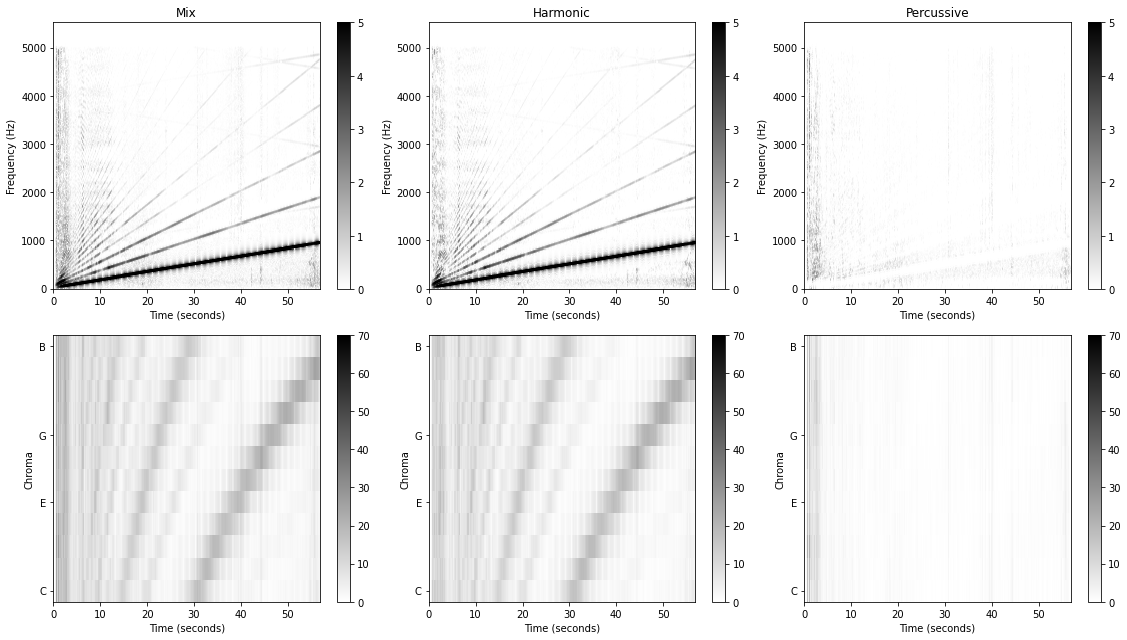

In [ ]:
plt.figure(figsize=(16, 9))    

X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
Y = np.log(1 + 10 * np.abs(X)) 
C = librosa.feature.chroma_stft(S=Y, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
ax = plt.subplot(2,3,1)
libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], title='Mix', clim=[0,5]);
ax = plt.subplot(2,3,4)
libfmp.b.plot_chromagram(C, Fs=Fs/H, ax=[ax], clim=[0,70], chroma_yticks=[0,4,7,11]);

X_h = librosa.stft(x_h, n_fft=N, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
Y_h = np.log(1 + 10 * np.abs(X_h)) 
C_h = librosa.feature.chroma_stft(S=Y_h, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
ax = plt.subplot(2,3,2)
libfmp.b.plot_matrix(Y_h, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], title='Harmonic', clim=[0,5]);
ax = plt.subplot(2,3,5)
libfmp.b.plot_chromagram(C_h, Fs=Fs/H, ax=[ax], clim=[0,70], chroma_yticks=[0,4,7,11]);

X_p = librosa.stft(x_p, n_fft=N, hop_length=H, win_length=N, window='hann', center=True, pad_mode='constant')
Y_p = np.log(1 + 10 * np.abs(X_p)) 
C_p = librosa.feature.chroma_stft(S=Y_p, sr=Fs, tuning=0, norm=None, hop_length=H, n_fft=N)
ax = plt.subplot(2,3,3)
libfmp.b.plot_matrix(Y_p, Fs=Fs/H, Fs_F=N/Fs, ax=[ax], title='Percussive', clim=[0,5]);
ax = plt.subplot(2,3,6)
libfmp.b.plot_chromagram(C_p, Fs=Fs/H, ax=[ax], clim=[0,70], chroma_yticks=[0,4,7,11]);

plt.tight_layout()
plt.show()

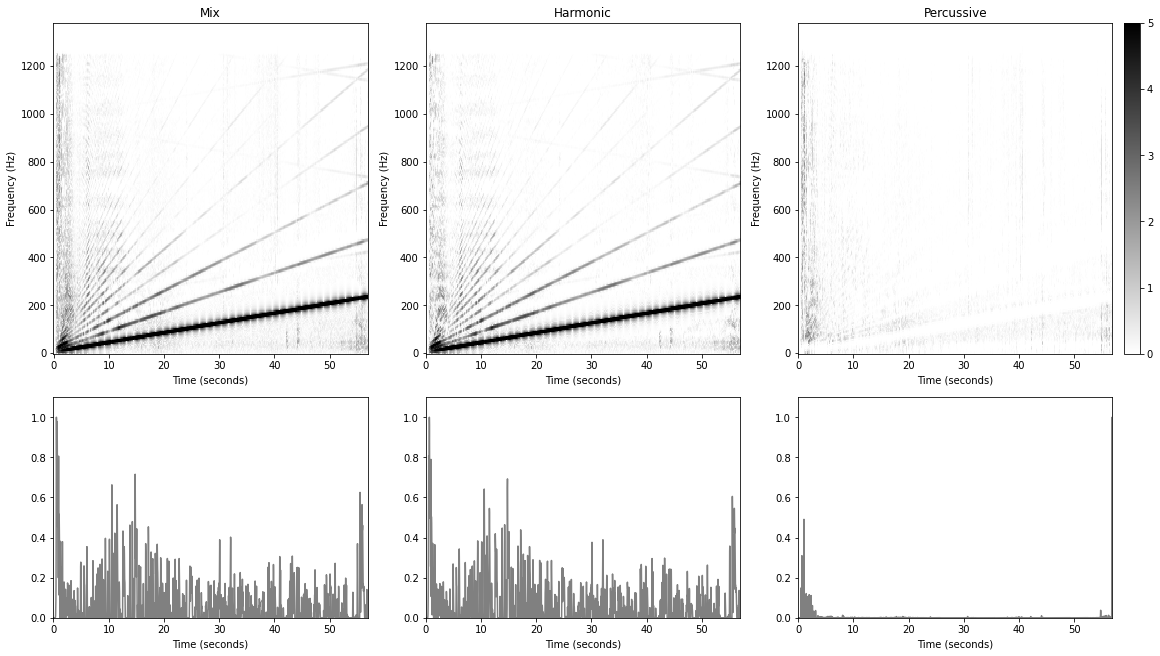

In [ ]:
fig, ax = plt.subplots(2, 4, gridspec_kw={'width_ratios': [1, 1,  1, 0.05], 
                                          'height_ratios': [1.5, 1]}, 
                       constrained_layout=True, figsize=(16, 9))    

# Plotting spectrograms
libfmp.b.plot_matrix(Y, Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,0]], colorbar=None, title='Mix', clim=[0,5]);
libfmp.b.plot_matrix(Y_h, Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,1]], colorbar=None, title='Harmonic', clim=[0,5]);
libfmp.b.plot_matrix(Y_p, Fs=Fs/H, Fs_F=N/Fs, ax=[ax[0,2],ax[0,3]], title='Percussive', clim=[0,5]);

# Computation and plotting of novelty curves
N, H = 2048, 256     
nov, Fs_nov = libfmp.c6.compute_novelty_energy(x, Fs=Fs,  N=N, H=H)
libfmp.b.plot_signal(nov, Fs=Fs_nov, ax=ax[1,0]);

nov, Fs_nov = libfmp.c6.compute_novelty_energy(x_h, Fs=Fs,  N=N, H=H)
libfmp.b.plot_signal(nov, Fs=Fs_nov, ax=ax[1,1]);

nov, Fs_nov = libfmp.c6.compute_novelty_energy(x_p, Fs=Fs,  N=N, H=H)
libfmp.b.plot_signal(nov, Fs=Fs_nov, ax=ax[1,2]);
ax[1,3].set_axis_off()
plt.show()

In [ ]:
from IPython.display import Audio